**This jupyter notebook demonstrates how to:**

1. 
2. 


In [8]:
#install libs that are not found at google colab by default
!pip install google

**Mount google drive to access files**

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Important defines:
#total number of lift stations
NUMBER_OF_LIFT_STATIONS = 30 

#number of pumps per lift stations
PUMPS_PER_LIFT_STATION  = [2,2,3,3,3,1,2,3,2,2,3,3,2,2,2,
                           2,3,2,2,2,2,2,2,2,2,2,2,2,2,2]

#google drive folder where datasets are stored
DATASETS_DIR = r'/content/gdrive/My Drive/datasets/'                         


In [0]:
import pandas as pd
import numpy as np

**Analysis with lift stations register**

This data frame contains characteristics and specifications about sewage lift stations 

In [0]:
lift_station_register = pd.read_csv(DATASETS_DIR + r'cadastro_elevatorias.csv')

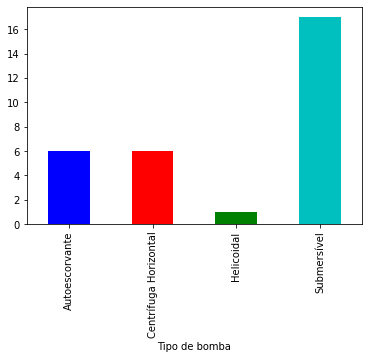

In [60]:
#Plot number of lift stations by pump type
lift_station_register.groupby(['Tipo de bomba'])['Tipo de bomba'].count().plot(kind='bar', color=['b', 'r', 'g', 'c'])


In [0]:
#define a function to plot histograms with some nice formatting

def hist_with_format(ds, bins, xlabel, ylabel):
  """
    plot a histogram

    Args:
        ds (series): panda series to create histogram.
        column_name (str): column name.
        bins (int): number of bins.
        xlabel (str): x axis label.
        ylabel (str): y axis label.                        

    Returns:
        Nothing  

  """
  ax = ds.hist(bins=bins, 
                grid=False, 
                figsize=(12,8),
                color='g', 
                zorder=2, 
                rwidth=0.9)

  # Despine
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)

  # Switch off ticks
  ax.tick_params(axis="both", which="both", 
                bottom="off", top="off", 
                labelbottom="on", left="off", 
                right="off", labelleft="on")

  # Draw horizontal axis lines
  vals = ax.get_yticks()
  for tick in vals:
      ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Remove title
  ax.set_title("")

  # Set x-axis label
  ax.set_xlabel(xlabel, labelpad=20, weight='bold', size=12)

  # Set y-axis label
  ax.set_ylabel(ylabel, labelpad=20, weight='bold', size=12)

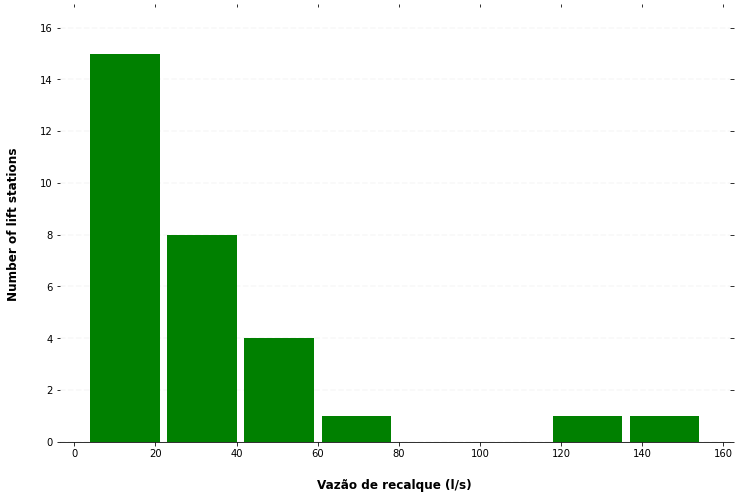

In [97]:
#Plot histogram of boost flow
ds = lift_station_register['Vazão de recalque (l/s)'].str.replace(',', '.').astype(float)

hist_with_format(ds, 
                 8, 
                 "Vazão de recalque (l/s)",
                 "Number of lift stations")

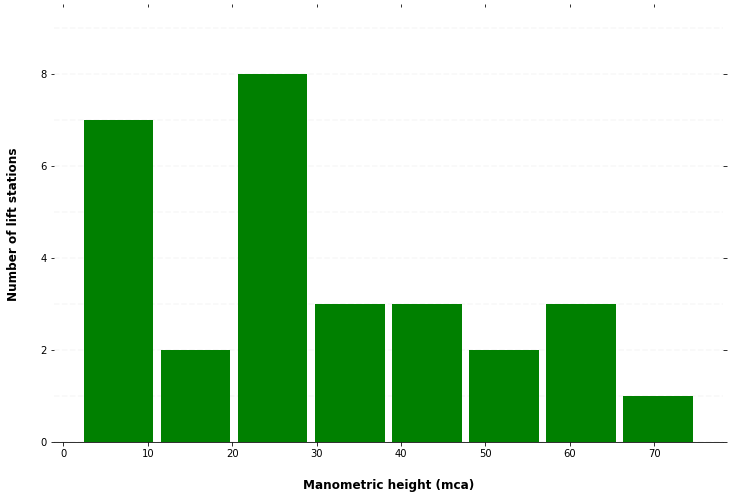

In [101]:
#Plot histogram of Manometric height
ds = lift_station_register['Altura manométrica (mca)'].str.replace(',', '.').astype(float)

hist_with_format(ds, 
                 8, 
                 "Manometric height (mca)",
                 "Number of lift stations")